In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2025-10-12 10:28:49.916732: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-12 10:28:49.927644: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-12 10:28:50.448597: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-12 10:28:54.239315: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

--- Loading and Preprocessing Sequence Data ---
Found classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Final training data shape: (1200, 174, 25)

--- Step 3: Building the LSTM Model ---


2025-10-11 21:25:13.379230: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/manas/Desktop/ML_SpeechEmotion/speech_emotion_venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 174, 128)       │        78,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 174, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,936 (519.28 KB)

 Trainable params: 132,936 (519.28 KB)

 Non-trainable params: 0 (0.00 B)


--- Step 4: Training the Model ---
Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.1692 - loss: 2.0582 - val_accuracy: 0.2333 - val_loss: 1.9780 - learning_rate: 0.0010
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.2300 - loss: 1.9657 - val_accuracy: 0.2792 - val_loss: 1.8665 - learning_rate: 0.0010
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.2458 - loss: 1.8828 - val_accuracy: 0.3542 - val_loss: 1.8044 - learning_rate: 0.0010
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.2900 - loss: 1.8359 - val_accuracy: 0.3125 - val_loss: 1.8027 - learning_rate: 0.0010
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.2708 - loss: 1.8745 - val_accuracy: 0.2542 - val_loss: 1.9177 - learning_rate: 0.0010
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.2483 - loss: 1.9279 - val_accuracy: 0.2792 - val_loss: 1.9032 - learning_rate: 0.0010
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/st

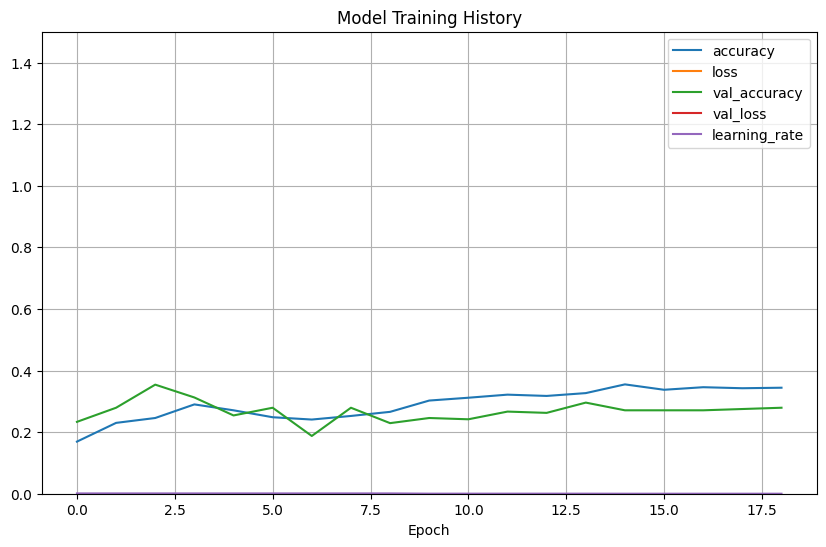


Test Accuracy (LSTM Model): 31.25%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


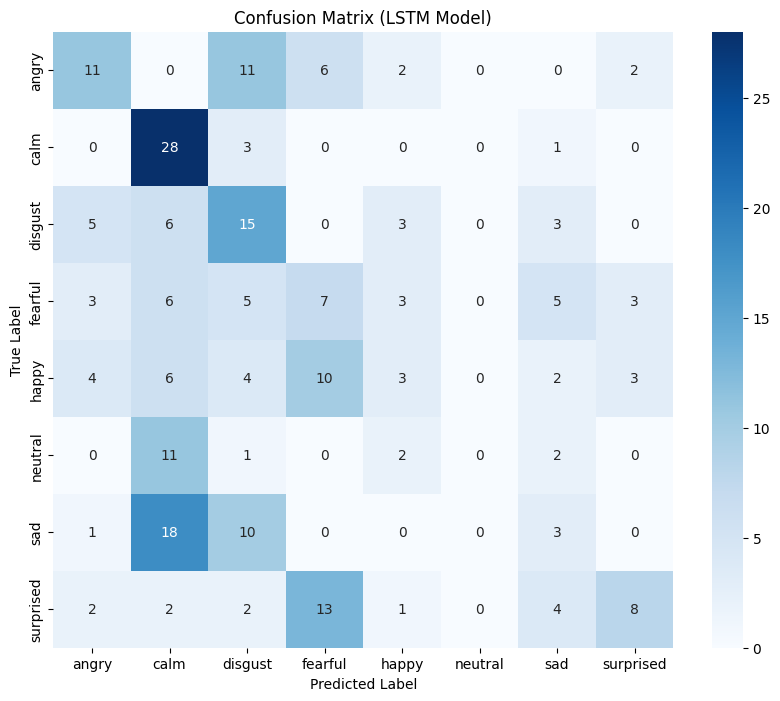


--- Step 6: Saving the Trained Model ---
LSTM model saved to lstm_sequence_model.h5


In [ ]:
# Baseline

SEQUENCE_PATH = 'sequences'
BATCH_SIZE = 32
EPOCHS = 100
MODEL_SAVE_PATH = 'lstm_sequence_model.h5'

print("--- Loading and Preprocessing Sequence Data ---")
X_train = np.load(os.path.join(SEQUENCE_PATH, 'X_train_seq.npy'))
y_train = np.load(os.path.join(SEQUENCE_PATH, 'y_train_seq.npy'))
X_test = np.load(os.path.join(SEQUENCE_PATH, 'X_test_seq.npy'))
y_test = np.load(os.path.join(SEQUENCE_PATH, 'y_test_seq.npy'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Label Encoding
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
class_names = le.classes_
num_classes = len(class_names)
print(f"Found classes: {class_names}")
print(f"Final training data shape: {X_train.shape}")

print("\n--- Building the LSTM Model ---")

def create_lstm_model(input_shape, num_classes):
    model = Sequential()

    # We stack LSTM layers. return_sequences=True is needed for all but the last LSTM layer.
    # This passes the full sequence of hidden states to the next layer.
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.4))
    
    # The final LSTM layer does not return sequences, only the final output.
    model.add(LSTM(64))
    model.add(Dropout(0.4))

    # Classifier Head
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
input_shape = (X_train.shape[1], X_train.shape[2])
lstm_model = create_lstm_model(input_shape, num_classes)
lstm_model.summary()

print("\n--- Training the Model ---")

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

history = lstm_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr]
)

print("\n--- Evaluating the Model ---")

# Plot training history
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.show()

# Evaluate on the test set
loss, accuracy = lstm_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy (LSTM Model): {accuracy * 100:.2f}%")

# confusion matrix
y_pred = np.argmax(lstm_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (LSTM Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# saving the model
print("\n--- Saving the Trained Model ---")
lstm_model.save(MODEL_SAVE_PATH)
print(f"LSTM model saved to {MODEL_SAVE_PATH}")

--- Loading and Preprocessing Sequence Data ---
Found classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Final training data shape: (1200, 174, 27)

--- Step 3: Building the LSTM Model ---


/home/manas/Desktop/ML_SpeechEmotion/speech_emotion_venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 174, 128)       │        79,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 174, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,960 (523.28 KB)

 Trainable params: 133,960 (523.28 KB)

 Non-trainable params: 0 (0.00 B)


--- Step 4: Training the Model ---
Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.1550 - loss: 2.0751 - val_accuracy: 0.2083 - val_loss: 1.9945 - learning_rate: 0.0010
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.1675 - loss: 2.0356 - val_accuracy: 0.1792 - val_loss: 1.9884 - learning_rate: 0.0010
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.1908 - loss: 2.0086 - val_accuracy: 0.2167 - val_loss: 1.9740 - learning_rate: 0.0010
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.2192 - loss: 1.9902 - val_accuracy: 0.2542 - val_loss: 1.9523 - learning_rate: 0.0010
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.2233 - loss: 1.9795 - val_accuracy: 0.3125 - val_loss: 1.8788 - learning_rate: 0.0010
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.2300 - loss: 1.9794 - val_accuracy: 0.2000 - val_loss: 1.9833 - learning_rate: 0.0010
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/s

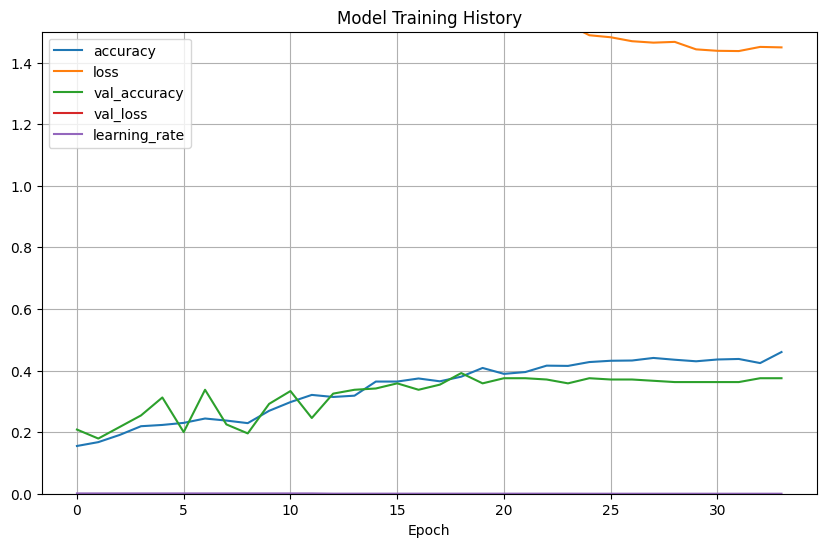


Test Accuracy (LSTM Model): 39.17%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


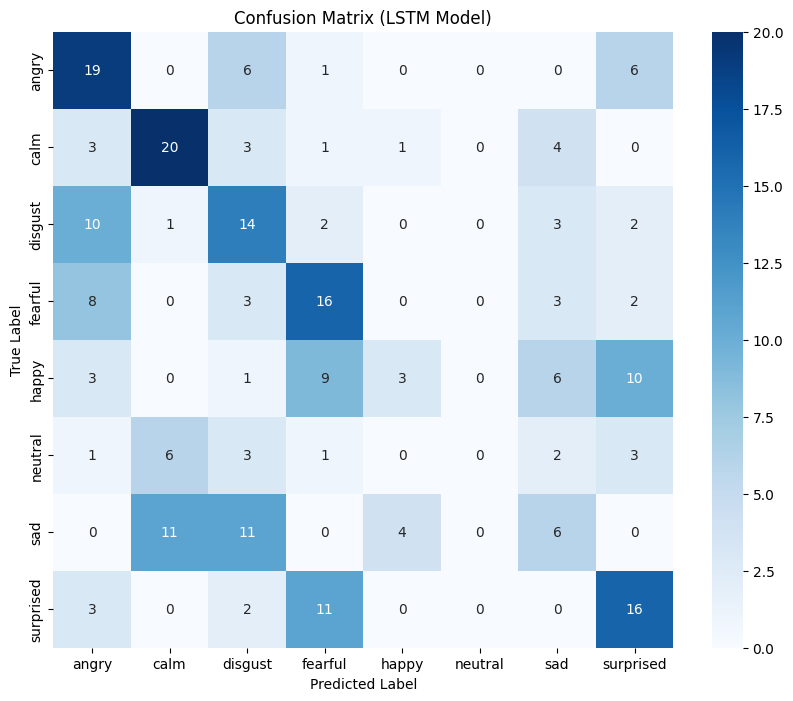


--- Step 6: Saving the Trained Model ---
LSTM model saved to lstm_sequence_model.h5


In [ ]:
# After augmentation + zcr and rms.

SEQUENCE_PATH = 'sequences'
BATCH_SIZE = 32
EPOCHS = 100
MODEL_SAVE_PATH = 'lstm_sequence_model.h5'

print("--- Loading and Preprocessing Sequence Data ---")
X_train = np.load(os.path.join(SEQUENCE_PATH, 'X_train_seq.npy'))
y_train = np.load(os.path.join(SEQUENCE_PATH, 'y_train_seq.npy'))
X_test = np.load(os.path.join(SEQUENCE_PATH, 'X_test_seq.npy'))
y_test = np.load(os.path.join(SEQUENCE_PATH, 'y_test_seq.npy'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Label Encoding
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
class_names = le.classes_
num_classes = len(class_names)
print(f"Found classes: {class_names}")
print(f"Final training data shape: {X_train.shape}")

print("\n--- Building the LSTM Model ---")

def create_lstm_model(input_shape, num_classes):
    model = Sequential()

    # We stack LSTM layers. return_sequences=True is needed for all but the last LSTM layer.
    # This passes the full sequence of hidden states to the next layer.
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.4))
    
    # The final LSTM layer does not return sequences, only the final output.
    model.add(LSTM(64))
    model.add(Dropout(0.4))

    # Classifier Head
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
input_shape = (X_train.shape[1], X_train.shape[2])
lstm_model = create_lstm_model(input_shape, num_classes)
lstm_model.summary()

print("\n--- Training the Model ---")

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

history = lstm_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr]
)

print("\n--- Evaluating the Model ---")

# Plot training history
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.show()

# Evaluate on the test set
loss, accuracy = lstm_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy (LSTM Model): {accuracy * 100:.2f}%")

# confusion matrix
y_pred = np.argmax(lstm_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (LSTM Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# saving the model
print("\n--- Saving the Trained Model ---")
lstm_model.save(MODEL_SAVE_PATH)
print(f"LSTM model saved to {MODEL_SAVE_PATH}")

--- Loading and Preprocessing Sequence Data ---
Found classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Final training data shape: (1200, 174, 27)

--- Building the LSTM Model ---


2025-10-12 10:28:59.831073: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/manas/Desktop/ML_SpeechEmotion/speech_emotion_venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 174, 128)       │        79,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 174, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,960 (523.28 KB)

 Trainable params: 133,960 (523.28 KB)

 Non-trainable params: 0 (0.00 B)


--- Training the Model ---
Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 393ms/step - accuracy: 0.1717 - loss: 2.0480 - val_accuracy: 0.2083 - val_loss: 2.0115 - learning_rate: 0.0010
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 345ms/step - accuracy: 0.2025 - loss: 1.9988 - val_accuracy: 0.1792 - val_loss: 1.9687 - learning_rate: 0.0010
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 340ms/step - accuracy: 0.2150 - loss: 1.9676 - val_accuracy: 0.2542 - val_loss: 1.8960 - learning_rate: 0.0010
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 347ms/step - accuracy: 0.2467 - loss: 1.9396 - val_accuracy: 0.2000 - val_loss: 1.9388 - learning_rate: 0.0010
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 347ms/step - accuracy: 0.2633 - loss: 1.8986 - val_accuracy: 0.2792 - val_loss: 1.9317 - learning_rate: 0.0010
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 348ms/step - accuracy: 0.2650 - loss: 1.8856 - val_accuracy: 0.2667 - val_loss: 1.8905 - learning_rate: 0.0010
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 337ms

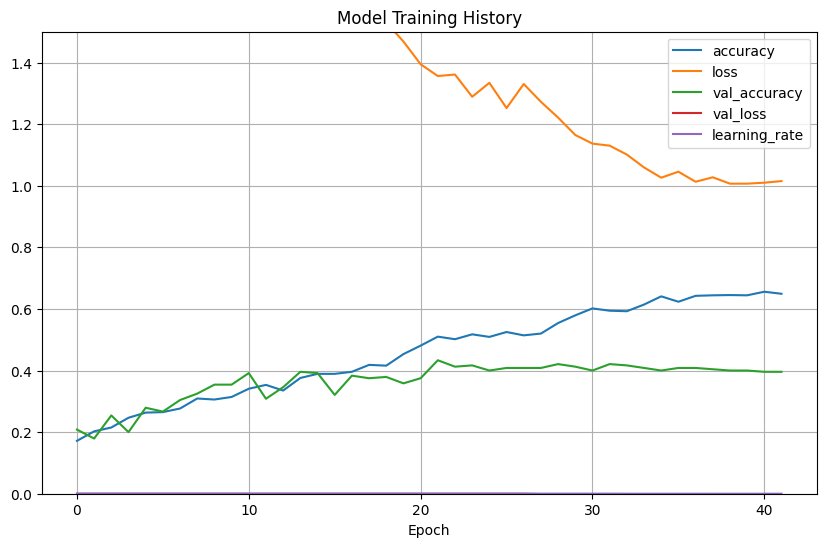


Test Accuracy (LSTM Model): 43.33%
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step


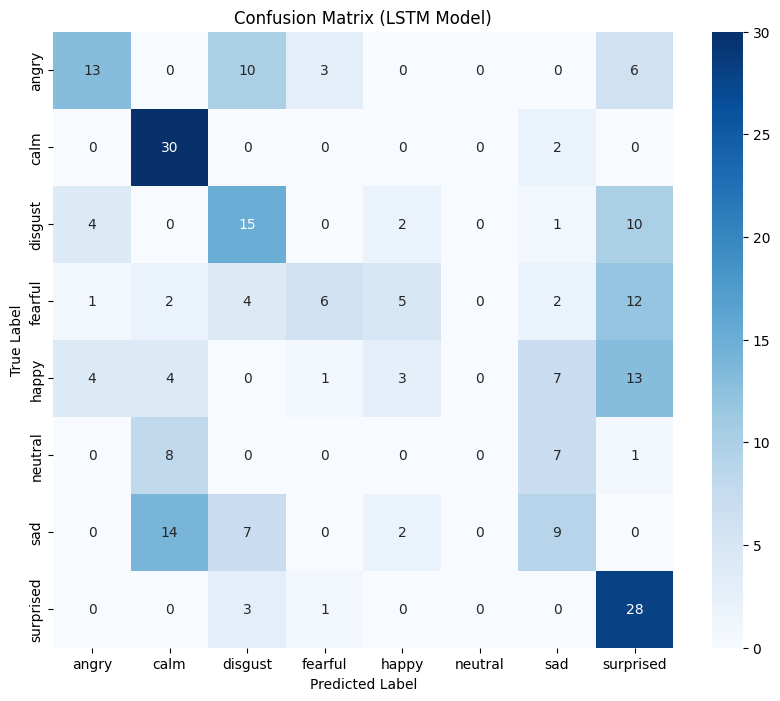


--- Saving the Trained Model ---
LSTM model saved to lstm_sequence_model.h5


In [3]:
# After augmentation + zcr and rms (increased patience)

SEQUENCE_PATH = 'sequences'
BATCH_SIZE = 32
EPOCHS = 100
MODEL_SAVE_PATH = 'lstm_sequence_model.h5'

print("--- Loading and Preprocessing Sequence Data ---")
X_train = np.load(os.path.join(SEQUENCE_PATH, 'X_train_seq.npy'))
y_train = np.load(os.path.join(SEQUENCE_PATH, 'y_train_seq.npy'))
X_test = np.load(os.path.join(SEQUENCE_PATH, 'X_test_seq.npy'))
y_test = np.load(os.path.join(SEQUENCE_PATH, 'y_test_seq.npy'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Label Encoding
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
class_names = le.classes_
num_classes = len(class_names)
print(f"Found classes: {class_names}")
print(f"Final training data shape: {X_train.shape}")

print("\n--- Building the LSTM Model ---")

def create_lstm_model(input_shape, num_classes):
    model = Sequential()

    # We stack LSTM layers. return_sequences=True is needed for all but the last LSTM layer.
    # This passes the full sequence of hidden states to the next layer.
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.4))
    
    # The final LSTM layer does not return sequences, only the final output.
    model.add(LSTM(64))
    model.add(Dropout(0.4))

    # Classifier Head
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
input_shape = (X_train.shape[1], X_train.shape[2])
lstm_model = create_lstm_model(input_shape, num_classes)
lstm_model.summary()

print("\n--- Training the Model ---")

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

history = lstm_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr]
)

print("\n--- Evaluating the Model ---")

# Plot training history
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.show()

# Evaluate on the test set
loss, accuracy = lstm_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy (LSTM Model): {accuracy * 100:.2f}%")

# confusion matrix
y_pred = np.argmax(lstm_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (LSTM Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# saving the model
print("\n--- Saving the Trained Model ---")
lstm_model.save(MODEL_SAVE_PATH)
print(f"LSTM model saved to {MODEL_SAVE_PATH}")